## 7. Inferential Statistics

https://www.data-to-viz.com/

    
### How much data do we have??

**~38_500 clothing items without NA's**:

* Classified in **616 brands** -filtering types with > 10 products
* Classified in **8 types** -filtering types with > 410 products
* Classified in **16 colors** -filtering colors with > 1100 products


### Data distribution (evaluated in 6.clothes_EDA.ipynb)

* We only have one continuous variable (price_pack) so we **do not need to scale the data** <br/>
* I will **not drop outliers** since it is expected to find overwhelming prices in high class brands


** Using parametric tests in non-normal data:**

Our data is close but not-normally distributed, should we use ANOVA and t-tests?

Fortunately, an ANOVA is not very sensitive to moderate deviations from normality; simulation studies, using a variety of non-normal distributions, have shown that the false positive rate is not affected very much by this violation of the assumption (Glass et al. 1972, Harwell et al. 1992, Lix et al. 1996). This is because when you take a large number of random samples from a population, the means of those samples are approximately normally distributed even when the population is not normal.

Just about every parametric statistical test has a non-parametric substitute, such as the **Kruskal–Wallis test instead of a one-way anova, Wilcoxon signed-rank test instead of a paired t-test, and Spearman rank correlation instead of linear regression**. These non-parametric tests do not assume that the data fit the normal distribution. They do assume that the data in different groups have the same distribution as each other, however; if different groups have different shaped distributions (for example, one is skewed to the left, another is skewed to the right), a non-parametric test may not be any better than a parametric one.


I evaluated the normality using shapiro and according to the results, applied t-test or wilcoxon

### 0. Import modules and load data

In [1]:
# data manipualtion basics
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # ignorar warnings

# plotting
import seaborn as sns  # esta basada en matplotlib
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.rcParams['figure.figsize']=(8, 6)  # tamaño por defecto, decenas de pixeles

%matplotlib inline

## my own functions
from src import dataanalysis_fun1 as eda # Import my module


### STATISTICS
from scipy import stats

# ols = minimos cuadrados ordinarios, regresion lineal - anovas
import statsmodels.api as sm
from statsmodels.formula.api import ols

# chi test -independence
from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

# mean difference tests
from scipy.stats import shapiro
from scipy.stats import t
from scipy.stats import ttest_1samp 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu


In [12]:
clothes=pd.read_csv("../data/clean/clothes_simple.csv")
clothes_comp=pd.read_csv("../data/clean/clothes_complete.csv")

In [13]:
clothes_comp.head()

,brand,description,price,colour,shop,gender,description2,type,price_pack,brand_class,product_id
0,other,SDBrice LS2 - Jersey de punto fino para hombre...,36.19,beige,amz,men,sdbrice ls2 - jersey de punto fino para hombre...,sweater,36.19,middle,1
1,other,SDGibril - Jersey - 21107899,45.40,beige,amz,men,sdgibril - jersey - 21107899,sweater,45.40,middle,2
2,other,SDElijah 21107501 - Jersey de punto grueso par...,49.94,beige,amz,men,sdelijah 21107501 - jersey de punto grueso par...,sweater,49.94,middle,3
3,other,SDLenz Zipper SW - Sudadera - 21107421,62.44,beige,amz,men,sdlenz zipper sw - sudadera - 21107421,sweatshirt,62.44,middle,4
4,other,Norwin Jersey De Punto Troyer Suéter Sudadera ...,62.44,brown,amz,men,norwin jersey de punto troyer sueter sudadera ...,sweater,62.44,middle,5


In [33]:
brand_col_sum=clothes_comp[["brand","brand_class", "colour", "product_id"]].pivot_table(index=["brand_class","brand"], columns="colour", aggfunc="count", fill_value=0)
brand_col_sum["total"]=brand_col_sum.sum(axis=1)
brand_col_sum["perc_5"]=round(brand_col_sum["total"]*0.05, ndigits=0) # 5% of clothes available for each brand

In [45]:
brand_col_sum.head()

product_id                             \
colour                                  beige black blue brown gold gray   
brand_class brand                                                          
high        & Other Stories                17    30   18     5    0    1   
            AAPE BY A BATHING APE®          1     1    1     1    0    2   
            ALPHA INDUSTRIES                5     4    0     1    0    4   
            ASOS EDITION                    7    10    3     7    0    1   
            Abercrombie & Fitch             2     2   11     8    0    4   

                                                                            \
colour                             green multicolor orange pink purple red   
brand_class brand                                                            
high        & Other Stories           12         11      5    5      4   6   
            AAPE BY A BATHING APE®     0          0      0    2      0   0   
            ALPHA INDUSTRIES           5          0      3    8      6   2   
            ASOS EDITION               3          0      4    1      0   0   
            Abercrombie & Fitch        6          2      2    4      0   1   

                                                          total perc_5  
colour                             turquoise white yellow               
brand_class brand                                                       
high        & Other Stories                0    11      6   131    7.0  
            AAPE BY A BATHING APE®         0     3      0    11    1.0  
            ALPHA INDUSTRIES               4    10      2    54    3.0  
            ASOS EDITION                   0     1      1    38    2.0  
            Abercrombie & Fitch            0     8      1    51    3.0

In [44]:
#brand_col_sum[brand_col_sum < 5] = 0


for index_label, row in brand_col_sum.iterrows():
    # Do something with the row data
    print(f"Index Label: {index_label}")
    print("Row Data:")
    print(row)
    print("\n")

Index Label: ('high', '& Other Stories')
Row Data:
            colour    
product_id  beige          17.0
            black          30.0
            blue           18.0
            brown           5.0
            gold            0.0
            gray            1.0
            green          12.0
            multicolor     11.0
            orange          5.0
            pink            5.0
            purple          4.0
            red             6.0
            turquoise       0.0
            white          11.0
            yellow          6.0
total                     131.0
perc_5                      7.0
Name: (high, & Other Stories), dtype: float64


Index Label: ('high', 'AAPE BY A BATHING APE®')
Row Data:
            colour    
product_id  beige          1.0
            black          1.0
            blue           1.0
            brown          1.0
            gold           0.0
            gray           2.0
            green          0.0
            multicolor     0.0
     

            colour    
product_id  beige          1.0
            black          3.0
            blue           2.0
            brown          0.0
            gold           0.0
            gray           0.0
            green          1.0
            multicolor     0.0
            orange         1.0
            pink           0.0
            purple         0.0
            red            0.0
            turquoise      0.0
            white          4.0
            yellow         0.0
total                     12.0
perc_5                     1.0
Name: (high, Hugo Red), dtype: float64


Index Label: ('high', 'Hurley')
Row Data:
            colour    
product_id  beige         11.0
            black         10.0
            blue           5.0
            brown          8.0
            gold           0.0
            gray           8.0
            green         12.0
            multicolor     0.0
            orange         9.0
            pink           8.0
            purple         4.0
   

            colour    
product_id  beige         14.0
            black          0.0
            blue           0.0
            brown          2.0
            gold           0.0
            gray           1.0
            green          1.0
            multicolor     0.0
            orange         4.0
            pink           0.0
            purple         0.0
            red            0.0
            turquoise      0.0
            white          0.0
            yellow         3.0
total                     25.0
perc_5                     1.0
Name: (high, SELECTED HOMME), dtype: float64


Index Label: ('high', 'SILBON')
Row Data:
            colour    
product_id  beige         10.0
            black          0.0
            blue           4.0
            brown          9.0
            gold           0.0
            gray           0.0
            green          6.0
            multicolor     0.0
            orange         1.0
            pink           2.0
            purple         0

            colour    
product_id  beige          5.0
            black          2.0
            blue           2.0
            brown          0.0
            gold           0.0
            gray           0.0
            green          2.0
            multicolor     0.0
            orange         2.0
            pink           3.0
            purple         2.0
            red            2.0
            turquoise      1.0
            white          2.0
            yellow         0.0
total                     23.0
perc_5                     1.0
Name: (low, Alkato), dtype: float64


Index Label: ('low', 'Allbestop')
Row Data:
            colour    
product_id  beige          0.0
            black          0.0
            blue           0.0
            brown          0.0
            gold          22.0
            gray           0.0
            green          0.0
            multicolor     0.0
            orange         0.0
            pink           0.0
            purple         0.0
    

            colour    
product_id  beige          18.0
            black          34.0
            blue           22.0
            brown           7.0
            gold            0.0
            gray           10.0
            green          18.0
            multicolor      0.0
            orange          1.0
            pink            3.0
            purple          2.0
            red             2.0
            turquoise       0.0
            white          31.0
            yellow          1.0
total                     149.0
perc_5                      7.0
Name: (low, Dickies), dtype: float64


Index Label: ('low', 'Dinnesis')
Row Data:
            colour    
product_id  beige          0.0
            black          0.0
            blue           0.0
            brown          0.0
            gold           5.0
            gray           0.0
            green          1.0
            multicolor     0.0
            orange         3.0
            pink           0.0
            purple

            colour    
product_id  beige          1.0
            black          1.0
            blue           1.0
            brown          1.0
            gold           0.0
            gray           0.0
            green          2.0
            multicolor     0.0
            orange         1.0
            pink           2.0
            purple         1.0
            red            2.0
            turquoise      0.0
            white          0.0
            yellow         0.0
total                     12.0
perc_5                     1.0
Name: (low, IMTRA FASHION), dtype: float64


Index Label: ('low', 'Influence')
Row Data:
            colour    
product_id  beige           3.0
            black           3.0
            blue           13.0
            brown           7.0
            gold            0.0
            gray            0.0
            green          13.0
            multicolor     55.0
            orange          8.0
            pink           17.0
            purple

            colour    
product_id  beige          1.0
            black          3.0
            blue           3.0
            brown          2.0
            gold           0.0
            gray           0.0
            green          1.0
            multicolor     3.0
            orange         0.0
            pink           0.0
            purple         1.0
            red            0.0
            turquoise      0.0
            white          0.0
            yellow         1.0
total                     15.0
perc_5                     1.0
Name: (low, Missguided Maternity), dtype: float64


Index Label: ('low', 'Monki')
Row Data:
            colour    
product_id  beige          20.0
            black          31.0
            blue           27.0
            brown           6.0
            gold            0.0
            gray            1.0
            green          26.0
            multicolor     20.0
            orange          5.0
            pink           11.0
            pur

            colour    
product_id  beige          4.0
            black          1.0
            blue           1.0
            brown          2.0
            gold           0.0
            gray           0.0
            green          1.0
            multicolor     0.0
            orange         0.0
            pink           1.0
            purple         0.0
            red            2.0
            turquoise      1.0
            white          2.0
            yellow         0.0
total                     15.0
perc_5                     1.0
Name: (low, REORIA), dtype: float64


Index Label: ('low', 'REVHQ')
Row Data:
            colour    
product_id  beige         12.0
            black          0.0
            blue           0.0
            brown          0.0
            gold           1.0
            gray           0.0
            green          0.0
            multicolor     0.0
            orange         1.0
            pink           0.0
            purple         1.0
        

            colour    
product_id  beige          4.0
            black         15.0
            blue           4.0
            brown          4.0
            gold           0.0
            gray           1.0
            green          7.0
            multicolor    23.0
            orange         3.0
            pink           3.0
            purple         1.0
            red            2.0
            turquoise      0.0
            white          6.0
            yellow         1.0
total                     74.0
perc_5                     4.0
Name: (low, Topshop Petite), dtype: float64


Index Label: ('low', 'Topshop Tall')
Row Data:
            colour    
product_id  beige          3.0
            black          9.0
            blue           0.0
            brown          2.0
            gold           0.0
            gray           4.0
            green          1.0
            multicolor     5.0
            orange         2.0
            pink           0.0
            purple      

            colour    
product_id  beige          0.0
            black          0.0
            blue           0.0
            brown          0.0
            gold           5.0
            gray           0.0
            green          0.0
            multicolor     0.0
            orange         2.0
            pink           0.0
            purple         0.0
            red            0.0
            turquoise      2.0
            white          0.0
            yellow         1.0
total                     10.0
perc_5                     0.0
Name: (low, YANFJHV), dtype: float64


Index Label: ('low', 'YEPREM')
Row Data:
            colour    
product_id  beige          37.0
            black           0.0
            blue            0.0
            brown           0.0
            gold           41.0
            gray            0.0
            green           0.0
            multicolor      0.0
            orange          0.0
            pink            0.0
            purple         

            colour    
product_id  beige          0.0
            black          2.0
            blue           2.0
            brown          0.0
            gold           0.0
            gray           0.0
            green          0.0
            multicolor     0.0
            orange         0.0
            pink           2.0
            purple         4.0
            red            3.0
            turquoise      0.0
            white          3.0
            yellow         0.0
total                     16.0
perc_5                     1.0
Name: (middle, AjezMax), dtype: float64


Index Label: ('middle', 'Allegra K')
Row Data:
            colour    
product_id  beige          30.0
            black          12.0
            blue           19.0
            brown          34.0
            gold           27.0
            gray           12.0
            green          28.0
            multicolor      0.0
            orange         25.0
            pink           29.0
            purple

            colour    
product_id  beige          7.0
            black         10.0
            blue           7.0
            brown          5.0
            gold           0.0
            gray           0.0
            green         21.0
            multicolor     9.0
            orange         1.0
            pink           9.0
            purple         1.0
            red            2.0
            turquoise      0.0
            white          4.0
            yellow         3.0
total                     79.0
perc_5                     4.0
Name: (middle, Glamorous), dtype: float64


Index Label: ('middle', 'Glamorous Bloom')
Row Data:
            colour    
product_id  beige          1.0
            black          0.0
            blue           3.0
            brown          1.0
            gold           0.0
            gray           0.0
            green          6.0
            multicolor     1.0
            orange         0.0
            pink           1.0
            purple  

            colour    
product_id  beige          1.0
            black          7.0
            blue           6.0
            brown          4.0
            gold           0.0
            gray           1.0
            green          1.0
            multicolor     0.0
            orange         0.0
            pink           4.0
            purple         3.0
            red            3.0
            turquoise      0.0
            white          3.0
            yellow         3.0
total                     36.0
perc_5                     2.0
Name: (middle, Nike Running), dtype: float64


Index Label: ('middle', 'Nike Training')
Row Data:
            colour    
product_id  beige          0.0
            black          9.0
            blue           3.0
            brown          1.0
            gold           0.0
            gray           0.0
            green          2.0
            multicolor     1.0
            orange         0.0
            pink           4.0
            purple 

            colour    
product_id  beige          1.0
            black          1.0
            blue           1.0
            brown          0.0
            gold           0.0
            gray           2.0
            green          3.0
            multicolor     0.0
            orange         0.0
            pink           1.0
            purple         2.0
            red            3.0
            turquoise      1.0
            white          0.0
            yellow         0.0
total                     15.0
perc_5                     1.0
Name: (middle, ZANZEA), dtype: float64


Index Label: ('middle', 'ZIOOER')
Row Data:
            colour    
product_id  beige          1.0
            black          2.0
            blue           1.0
            brown          2.0
            gold           0.0
            gray           3.0
            green          5.0
            multicolor     0.0
            orange         3.0
            pink           2.0
            purple         2.0
 

## 0. Is there a **correlation** between the brand **average pricing** <br/> and the **number of colors** of their item collection??

### Simple linear regression - available in Seaborn plot


NO, THERE IS NOT

## 2. Significantly popular colors in men and women clothing

### $\chi^2$ chi-cuadrado - Test of independence

* H0: Color of the clothing and the gender to whom is directed are **independent** <br/>
* H1: Color of the clothing and the gender to whom is directed are **dependent** <br/>



RESIDUALS:

Th residuals indicate the **extent to which observed counts differ from the expected counts** if there were no association between the variables. <br/> *Residual = (Observed - Expected) / sqrt(Expected)*

These residuals help in identifying which cells contribute the most to the chi-squared statistic

In [52]:
wo_colortype_df=clothes[clothes["gender"]=="women"].pivot_table(columns="type", index="colour",  aggfunc="size", fill_value=0)
wo_colortype_df["total"]=wo_colortype_df.sum(axis=1)

me_colortype_df=clothes[clothes["gender"]=="men"].pivot_table(columns="type", index="colour",  aggfunc="size", fill_value=0)
me_colortype_df["total"]=me_colortype_df.sum(axis=1)

column_list=wo_colortype_df.columns[:-1]

### 2.1 All clothing types together

In [82]:
contig=pd.concat([wo_colortype_df["total"], me_colortype_df["total"]], axis=1)
contig.columns=["women", "men"]
chi2, pval, dof, ex= chi2_contingency(contig)

obs_exp_df=(np.array(contig)-ex ) / ex ** 0.5

obs_exp_df=pd.DataFrame(obs_exp_df)
obs_exp_df.columns=["women", "men"]
obs_exp_df.index=contig.index

obs_exp_df=obs_exp_df.sort_values("men", ascending=False)
obs_exp_df, pval

(                women        men
 colour                          
 gray        -5.058031   6.844313
 turquoise   -3.709310   5.019281
 red         -3.237931   4.381431
 yellow      -2.974042   4.024347
 orange      -2.159362   2.921957
 purple      -1.858582   2.514954
 white       -1.421021   1.922866
 blue        -1.378396   1.865188
 brown       -0.916037   1.239542
 beige       -0.567839   0.768375
 gold        -0.197723   0.267550
 pink         1.532851  -2.074190
 green        1.821887  -2.465300
 black        6.604352  -8.936729
 multicolor  13.277233 -17.966188,
 1.0440856006458361e-170)

In [84]:
#  1.0440856006458361e-170
df = pd.DataFrame(obs_exp_df, index=obs_exp_df.index)

# Reset index to have 'colour' as a column
df = df.reset_index()

# Reshape the table to have one column for gender and one for colour
pop_col_chi2resid = pd.melt(df, id_vars=['colour'], var_name='gender', value_name='value')
pop_col_chi2resid["type_test"]="chi2"
pop_col_chi2resid.columns=[["colour", "gender", "residual", "type_test"]]

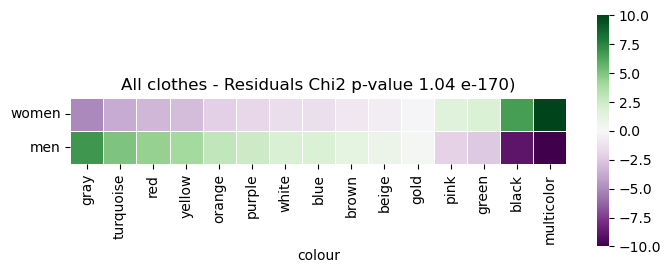

In [55]:
figsize=(12, 6)  # 1 row, 2 columns for side-by-side plots

#vmin = min(wo_mat.min().min(), me_mat.min().min())
#vmax = max(wo_mat.max().max(), me_mat.max().max())

vmin = -10
vmax = 10

heatmap1=sns.heatmap(obs_exp_df.T,
            cmap='PRGn',
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},  vmin=vmin,vmax=vmax)
heatmap1.set_title('All clothes - Residuals Chi2 p-value 1.04 e-170)');

### 2.2 Significantly popular colors based on clothing `type` T-SHIRT ONLY



In [56]:
contig=pd.concat([wo_colortype_df["tshirt"], me_colortype_df["tshirt"]], axis=1)
contig.columns=["women", "men"]
chi2, pval, dof, ex= chi2_contingency(contig)

obs_exp_df=(np.array(contig)-ex ) / ex ** 0.5

obs_exp_df=pd.DataFrame(obs_exp_df)
obs_exp_df.columns=["women", "men"]
obs_exp_df.index=contig.index

tshirt_obs_exp_df=obs_exp_df.sort_values("men", ascending=False)
obs_exp_df, pval

(               women       men
 colour                        
 beige       1.117654 -2.012178
 black      -2.409466  4.337905
 blue       -5.498350  9.899005
 brown      -0.550419  0.990952
 gold        1.794598 -3.230921
 gray       -0.494784  0.890790
 green      -1.643677  2.959209
 multicolor -4.000038  7.201505
 orange      3.006432 -5.412658
 pink        2.563202 -4.614685
 purple      2.211458 -3.981420
 red         2.403457 -4.327087
 turquoise   3.976926 -7.159896
 white      -2.073633  3.733284
 yellow      3.358915 -6.047253,
 2.391339133415867e-97)

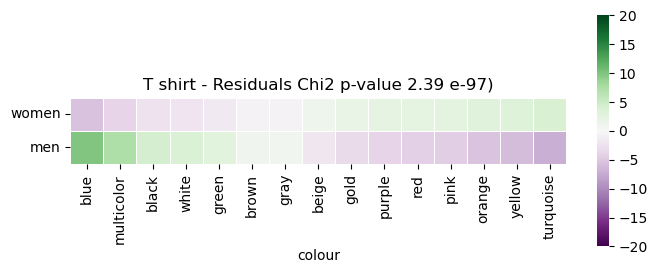

In [57]:
figsize=(12, 6)  # 1 row, 2 columns for side-by-side plots

#vmin = min(wo_mat.min().min(), me_mat.min().min())
#vmax = max(wo_mat.max().max(), me_mat.max().max())

vmin = -20
vmax = 20

heatmap1=sns.heatmap(tshirt_obs_exp_df.T,
            cmap='PRGn',
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},  vmin=vmin,vmax=vmax)
heatmap1.set_title('T shirt - Residuals Chi2 p-value 2.39 e-97)');

In [ ]:
# FOR WOMEN

wo_colortype_df2=wo_colortype_df.drop("total", axis=1)

allcolor_list=clothes["colour"].unique()
types_list=clothes["type"].unique()

chi_pvalues_df2=pd.DataFrame()
chi_obsexp_df2=pd.DataFrame()

for typ in types_list: # for each clothing type
# create a df 
    chi_pvalues_df=pd.DataFrame(index=allcolor_list, columns=[typ])
    chi_obsexp_df=pd.DataFrame(index=allcolor_list, columns=[typ])

    for col in allcolor_list: # for each color
        # col x, type y
        A1=wo_colortype_df2[[typ]][wo_colortype_df2.index==col]
        A1=A1.iloc[0,0]
        # col x, not-type y
        B1=wo_colortype_df2.drop(typ, axis=1)[wo_colortype_df2.index==col].sum(axis=1)
        # not-col x, type y
        A2=sum(np.array(wo_colortype_df2[[typ]][wo_colortype_df2.index!=col]))[0]
        # not not
        B2=wo_colortype_df2.drop(typ, axis=1)[wo_colortype_df2.index!=col].sum(axis=1).sum(axis=0)
        
        #####
        cross_df = pd.DataFrame(index=["type_X", "other"], columns=["col_X", "other"])
        cross_df.iloc[0,]=[A1, int(A2)]
        cross_df.iloc[1,]=[int(B1), int(B2)]
        
        try:
            #Chi-square test of independence of variables in a contingency table.
            ji_dos, pval, dof, ex = chi2_contingency(cross_df) 
            
            #The expected frequencies
            ex_cross_df=pd.DataFrame(ex, index=["type_X", "other"], columns=["col_X", "other"]) 
            
            chi_pvalues_df[chi_pval_df.index==col]= pval
            chi_obsexp_df[chi_pval_df.index==col]=(cross_df["col_X"][0]-ex_cross_df["col_X"][0])/ex_cross_df["col_X"][0]**0.5
        except:
            chi_pvalues_df[chi_pval_df.index==col]= 1
            chi_obsexp_df[chi_pval_df.index==col]= 0

    chi_pvalues_df2 = pd.concat([chi_pvalues_df2, chi_pvalues_df], axis=1)
    chi_obsexp_df2 = pd.concat([chi_obsexp_df2, chi_obsexp_df], axis=1)

    
#this prints only significant cells
wo_chi_pvalues_df = chi_pvalues_df2 <= 0.0001
wo_mat=chi_obsexp_df2[wo_chi_pvalues_df]
wo_mat.fillna(0, inplace=True)

In [145]:
# FOR MEN

me_colortype_df2=me_colortype_df.drop("total", axis=1)

allcolor_list=clothes["colour"].unique()
types_list=clothes["type"].unique()

chi_pvalues_df2=pd.DataFrame()
chi_obsexp_df2=pd.DataFrame()

for typ in types_list: # for each clothing type
# create a df 
    chi_pvalues_df=pd.DataFrame(index=allcolor_list, columns=[typ])
    chi_obsexp_df=pd.DataFrame(index=allcolor_list, columns=[typ])

    for col in allcolor_list: # for each color
        # col x, type y
        A1=me_colortype_df2[[typ]][me_colortype_df2.index==col]
        A1=A1.iloc[0,0]
        # col x, not-type y
        B1=me_colortype_df2.drop(typ, axis=1)[me_colortype_df2.index==col].sum(axis=1)
        # not-col x, type y
        A2=sum(np.array(me_colortype_df2[[typ]][me_colortype_df2.index!=col]))[0]
        # not not
        B2=me_colortype_df2.drop(typ, axis=1)[me_colortype_df2.index!=col].sum(axis=1).sum(axis=0)
        
        #####
        cross_df = pd.DataFrame(index=["type_X", "other"], columns=["col_X", "other"])
        cross_df.iloc[0,]=[A1, int(A2)]
        cross_df.iloc[1,]=[int(B1), int(B2)]
        
        try:
            #Chi-square test of independence of variables in a contingency table.
            ji_dos, pval, dof, ex = chi2_contingency(cross_df) 
            
            #The expected frequencies
            ex_cross_df=pd.DataFrame(ex, index=["type_X", "other"], columns=["col_X", "other"]) 
            
            chi_pvalues_df[chi_pval_df.index==col]= pval
            chi_obsexp_df[chi_pval_df.index==col]=(cross_df["col_X"][0]-ex_cross_df["col_X"][0])/ex_cross_df["col_X"][0]**0.5
        except:
            chi_pvalues_df[chi_pval_df.index==col]= 1
            chi_obsexp_df[chi_pval_df.index==col]= 0

    chi_pvalues_df2 = pd.concat([chi_pvalues_df2, chi_pvalues_df], axis=1)
    chi_obsexp_df2 = pd.concat([chi_obsexp_df2, chi_obsexp_df], axis=1)

    
#this prints only significant cells
me_chi_pvalues_df = chi_pvalues_df2 <= 0.0001
me_mat=chi_obsexp_df2[me_chi_pvalues_df]
me_mat.fillna(0, inplace=True)

In [152]:
cross_df

,col_X,other
type_X,60,426
other,476,12384


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for side-by-side plots

#vmin = min(wo_mat.min().min(), me_mat.min().min())
#vmax = max(wo_mat.max().max(), me_mat.max().max())

vmin = -20
vmax = 20

heatmap1=sns.heatmap(wo_mat.T,
            cmap='PRGn',
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5}, vmin=vmin,vmax=vmax,  ax=axes[0])
heatmap1.set_title('Women, residuals Chi2 p-value <0.0001')

heatmap2=sns.heatmap(me_mat.T,
            cmap='PRGn',
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},vmin=vmin,vmax=vmax,  ax=axes[1])
heatmap2.set_title('Men, residuals Chi2 p-value <0.0001')

plt.show();

## 3. Which is the most influencing factor in clothing prices: gender or color?

Is there a significant difference in average price between men and women **t-shirts**? <br/>
Due to sample size limitations, we can only evaluate t-shirts

To avoid misleading conclusions, we must **compare** the clothing `prices` within each `brand class`<br/>

### TWO-WAY ANOVA

Two independent categorical variables (gender, colour) and one dependent continous variable (tshirt price). 

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no sig diff in price) <br/>
$H1 :$ A at least one sig diff in price


SUM_SQ values:

Interpreting the sum_sq values involves comparing them to the total variability in the data and other factors in the model. A higher sum_sq value relative to others or a large sum_sq relative to the total sum_sq indicates that the corresponding factor explains a significant portion of the variability in the price_pack

### Discard price outliers by type

Price values > 4 standard deviations


In [60]:
type_list=list(clothes["type"].unique())
type_list

['sweater', 'sweatshirt', 'top', 'dress', 'tshirt', 'shirt']

In [61]:
clothes1=pd.DataFrame()
for typ in type_list:
    temp=clothes[clothes["type"]==typ]
    data=temp["price_pack"]
    z_scores = (data - data.mean()) / data.std() #Calculate Z-Scores for numerical columns
    threshold = 4 # Define a threshold (4 standard deviations)
    clothes1=clothes1.append(temp[np.abs(z_scores) < threshold]) # Exclude outliers


## 3.1 Which gender is more expensive?

### Two-sample, one-sided Mann-Whitney U test

In [62]:
men_price=clothes1["price_pack"][(clothes1["gender"]=="men")& (clothes1["type"]=="tshirt")]
women_price=clothes1["price_pack"][(clothes1["gender"]=="women")& (clothes1["type"]=="tshirt")]

shapiro(men_price).pvalue, shapiro(women_price).pvalue

# Perform one-sided Mann-Whitney U test
statistic, p_value = mannwhitneyu(men_price, women_price, alternative='greater')

men_price.mean(), women_price.mean(), p_value




(27.209482157957133, 23.628514549243437, 2.7274038754036104e-10)

In [81]:
mannu_genderprice=pd.DataFrame(columns=["gender", "mean_price", "pval", "type_test"])
mannu_genderprice["gender"]=["men", "women"]
mannu_genderprice["mean_price"]=[27.20, 23.62]
mannu_genderprice["pval"]=[2.7274038754036104e-10, 2.7274038754036104e-10]
mannu_genderprice["type_test"]=["mann_u","mann_u"]
mannu_genderprice


,gender,mean_price,pval,type_test
0,men,27.20,2.727404e-10,mann_u
1,women,23.62,2.727404e-10,mann_u


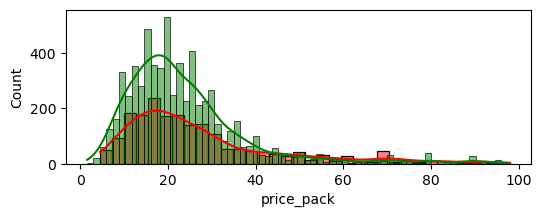

In [156]:
plt.figure(figsize=(6, 2))
sns.histplot(data=clothes1[(clothes1["gender"]=="men")& (clothes1["type"]=="tshirt")], x="price_pack", color="red", label="men", kde=True)#.set_xlim(0, 200)
sns.histplot(data=clothes1[(clothes1["gender"]=="women")& (clothes1["type"]=="tshirt")],x="price_pack", color="green", label="women", kde=True);#.set_xlim(0, 200)

In [67]:
## high class

df=clothes1[(clothes1["brand_class"]=="high") & (clothes1["type"]=="tshirt")]
df=df[["colour", "gender", "price_pack"]]

formula = 'price_pack ~ gender + colour'
modelo = ols(formula, df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)     # typ=2 significa two way
total_sum_sq = anova.loc['Residual', 'sum_sq']
anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
display(modelo.f_pvalue)

high_anova=modelo.f_pvalue

2.2839121639835702e-09

In [68]:
## middle class

df=clothes1[(clothes1["brand_class"]=="middle") & (clothes1["type"]=="tshirt")]
df=df[["colour", "gender", "price_pack"]]

formula = 'price_pack ~ gender + colour'
modelo = ols(formula, df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)     # typ=2 significa two way
total_sum_sq = anova.loc['Residual', 'sum_sq']
anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
display(modelo.f_pvalue)
anova #the variables has a statistically significant effect on the dependent variable.

middle_anova=modelo.f_pvalue

6.542349482241732e-08

In [69]:
## low class

df=clothes1[(clothes1["brand_class"]=="low") & (clothes1["type"]=="tshirt")]
df=df[["colour", "gender", "price_pack"]]

formula = 'price_pack ~ gender + colour'
modelo = ols(formula, df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)     # typ=2 significa two way
total_sum_sq = anova.loc['Residual', 'sum_sq']
anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
display(modelo.f_pvalue)

low_anova=modelo.f_pvalue

1.777976901461362e-11

In [75]:
brandclassdiff_anova2w=pd.DataFrame(columns=["brand_class", "pval", "type_test"])


brandclassdiff_anova2w["brand_class"]=["low", "middle", "high"]
brandclassdiff_anova2w["pval"]=[low_anova,middle_anova,high_anova]
brandclassdiff_anova2w["type_test"]=["anova2way", "anova2way", "anova2way"]

brandclassdiff_anova2w

,brand_class,pval,type_test
0,low,1.777977e-11,anova2way
1,middle,6.542349e-08,anova2way
2,high,2.283912e-09,anova2way


### ONE-WAY ANOVA . Does the color influences the price of clothing?

* Once we find that both color and gender influence the clothing prices, <br/> 
we will dig in color influence in men and women clothing independently.<br/>
Again, this decision is due to sample size limitations. <br/>
<br/>
* Notwithstanding, now that we split the analysis for men and women, <br/>
we can evaluate whether the color inlfuences the item prices in the different types of clothing.

Compare the `color` influence on `prices` :
   * By brand class
   * By type of clothing
   * By gender

In [121]:
df=clothes1[clothes1["gender"]=="women"]
df["type"].unique()

array(['sweater', 'sweatshirt', 'top', 'dress', 'tshirt', 'shirt'],
      dtype=object)

In [122]:
classes_list=clothes1["brand_class"].unique()
types_list=clothes1["type"].unique()

anova_res = pd.DataFrame(columns=["type", "brand_class", "pval", "residue"])

# FOR WOMEN
for cla in classes_list:
    for typ in types_list:
        df=clothes1[clothes1["gender"]=="women"]
        try:
            df=df[(df["brand_class"]==cla) & (df["type"]==typ)]
            df=df[["colour", "price_pack"]]
            formula = 'price_pack ~ colour'
            modelo = ols(formula, df).fit()
            anova = sm.stats.anova_lm(modelo, typ=1)     # typ=1 significa one way
            
            total_sum_sq = anova.loc['Residual', 'sum_sq']
            residue=anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
            
            anova_res.loc[len(anova_res)] = [typ, cla, round(modelo.f_pvalue, ndigits=10), residue[0]] 
        except:
            anova_res.loc[len(anova_res)] =[typ, cla, 1, 0]
            
wo_sign_anova=anova_res[anova_res["pval"]<2].sort_values("pval")

In [125]:
classes_list=clothes1["brand_class"].unique()
types_list=clothes1["type"].unique()

anova_res = pd.DataFrame(columns=["type", "brand_class", "pval", "residue"])

# FOR MEN
for cla in classes_list:
    for typ in types_list:
        df=clothes1[clothes1["gender"]=="men"]
        try:
            df=df[(df["brand_class"]==cla) & (df["type"]==typ)]
            df=df[["colour", "price_pack"]]
            formula = 'price_pack ~ colour'
            modelo = ols(formula, df).fit()
            anova = sm.stats.anova_lm(modelo, typ=1)     # typ=1 significa one way

            total_sum_sq = anova.loc['Residual', 'sum_sq']
            residue=anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
            
            anova_res.loc[len(anova_res)] = [typ, cla, round(modelo.f_pvalue, ndigits=10), residue[0]] 
        except:
            anova_res.loc[len(anova_res)] =[typ, cla, 1, 0]

        
me_sign_anova=anova_res[anova_res["pval"]<2].sort_values("pval")

In [126]:
me_sign_anova["gender"]="men"
wo_sign_anova["gender"]="women"

sign_anova=pd.concat([me_sign_anova, wo_sign_anova], axis=0)
sign_anova["type_test"]="anova1way"
typdiff_anova1w=sign_anova

In [129]:
typdiff_anova1w.value_counts("type")

type
shirt         6
sweater       6
sweatshirt    6
top           6
tshirt        6
dress         5
dtype: int64

In [130]:
typdiff_anova1w=typdiff_anova1w.sort_values("residue", ascending=False)
typdiff_anova1w

,type,brand_class,pval,residue,gender,type_test
9,dress,low,1.305924e-03,1.319307e+06,men,anova1way
2,top,middle,2.408909e-02,2.639093e+00,men,anova1way
6,sweater,low,8.695298e-04,8.239997e-01,women,anova1way
8,top,low,1.176170e-05,5.647718e-01,men,anova1way
13,sweatshirt,high,4.463886e-01,5.439112e-01,women,anova1way
12,sweater,high,8.846742e-01,3.004020e-01,women,anova1way
5,shirt,middle,4.415393e-03,2.891777e-01,men,anova1way
14,top,high,2.076261e-01,2.747632e-01,men,anova1way
7,sweatshirt,low,9.582380e-05,2.630296e-01,women,anova1way
17,shirt,high,5.209718e-01,2.628488e-01,men,anova1way


A residual of 0.5, when dealing with an average price of 25 euros, represents a difference of 0.5 euros from the expected value. In relative terms, this difference is around 2% of the average price (0.5 euros / 25 euros * 100).

### t-test: Which is the most expensive color?

For those items we found statistical differences in pricing according to the color (0.0001), <br/>
lets find which are indeed the most expensive colors

H0: Color X is not more expensive than Y

In [101]:
## COLOR CODES MATCH THE COLOR LABEL
colors_dict = {
    'brown': '#800000',
    'red': '#FF0000',
    'yellow': '#FFFF00',
    'blue': '#0000FF',
    'beige': '#F5F5DC',
    'white': '#FFFFFF',
    'gray': '#808080',
    'purple': '#800080',
    'multicolor': '#FF00FF',  # Specifying a different color for 'multicolor'
    'orange': '#FFA500',
    'black': '#000000',
    'pink': '#FFC0CB',
    'green': '#008000',
    'turquoise': '#40E0D0',
    'gold': '#FFD700'
}

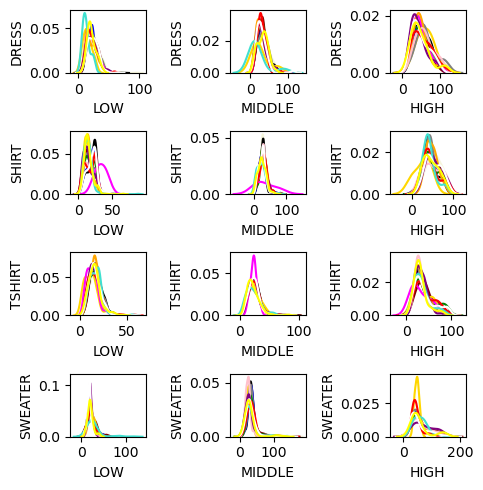

In [177]:
fig, ax = plt.subplots(4, 3, figsize=(5, 5))
classes_list=["low", "middle", "high"]
types_list=["dress", "shirt", "tshirt", "sweater"]

for j in range(len(types_list)):
    
    for i in range(len(classes_list)):
        df = clothes1[(clothes1["brand_class"] == classes_list[i]) & (clothes1["type"] == types_list[j])]

        for color, data in df.groupby('colour'):
            sns.kdeplot(data=data['price_pack'], label=color, color=colors_dict.get(color), ax=ax[j,i])
        ax[j,i].set_xlabel(classes_list[i].upper())
        ax[j,i].set_ylabel(types_list[j].upper())
    
plt.tight_layout()
plt.show()


In [181]:
sign_anova.head()

,type,brand_class,pval,residue,gender
8,top,low,1.176170e-05,0.564772,men
7,sweatshirt,low,9.582380e-05,0.263030,women
6,sweater,low,0.000000e+00,0.117236,men
11,shirt,low,0.000000e+00,0.095414,women
10,tshirt,low,4.209000e-07,0.082592,men


In [103]:
t_wilcx_test_res = pd.DataFrame(columns=["type", "brand_class", "gender", "colour", "test", "pval", "diff"])

allcolors=list(clothes["colour"].unique())

for i in range(len(sign_anova)):
    
    typ=sign_anova["type"].iloc[i]
    cla=sign_anova["brand_class"].iloc[i]
    gen=sign_anova["gender"].iloc[i]

    df = clothes1[(clothes1["brand_class"] == cla) & (clothes1["type"] == typ) &(clothes1["gender"] == gen)]
    
    for col in allcolors:
        
        # ensure a minimum sample size
        
        if (len(df[df["colour"]==col]) >= 20):
        
            mu=df["price_pack"].mean()
            
            # Do not reject Ho, i.e., NORMAL - T-test
            if(shapiro(df["price_pack"]).pvalue >= 0.05): 
                test = ttest_1samp(df[df["colour"]==col]["price_pack"], mu, alternative='greater').pvalue
                diff = df[df["colour"] == col]["price_pack"].mean()-mu
                t_wilcx_test_res.loc[len(t_wilcx_test_res)] =[typ, cla, gen, col, "ttest", test, diff]

            # We reject Ho, i.e., NON-NORMAL - Wilcoxon            
            else: 
                test = wilcoxon(df[df["colour"] == col]["price_pack"]-mu, alternative='greater').pvalue
                diff = df[df["colour"] == col]["price_pack"].mean()-mu
                t_wilcx_test_res.loc[len(t_wilcx_test_res)] =[typ, cla, gen, col, "wilcox", test, diff]
        
        else:
            
            t_wilcx_test_res.loc[len(t_wilcx_test_res)] =[typ, cla, gen, col, "none", 1, 0]
    
    
t_wilcx_test_res=t_wilcx_test_res[t_wilcx_test_res["pval"]<2]

In [104]:
t_wilcx_test_res.sort_values(["gender", "colour"])
t_wilcx_test_res["colour"].unique()

array(['beige', 'brown', 'red', 'yellow', 'blue', 'white', 'gray',
       'purple', 'multicolor', 'orange', 'black', 'pink', 'green',
       'turquoise', 'gold'], dtype=object)

In [105]:
t_wilcx_test_res.sort_values("diff", ascending=False)

,type,brand_class,gender,colour,test,pval,diff
112,sweater,high,men,purple,wilcox,0.064039,14.743974
146,sweatshirt,high,men,pink,wilcox,0.047846,9.631841
116,sweater,high,men,pink,wilcox,0.261755,8.752199
106,sweater,high,men,brown,wilcox,0.127986,8.274816
151,tshirt,high,men,brown,wilcox,0.059139,8.226041
...,...,...,...,...,...,...,...
478,shirt,high,women,turquoise,wilcox,0.980463,-7.032149
29,sweatshirt,middle,men,gold,wilcox,1.000000,-7.144914
107,sweater,high,men,red,wilcox,0.999995,-9.206277
11,sweater,middle,men,pink,wilcox,1.000000,-9.211610


In [107]:
t_wilcx_test_res.columns=["type", "brand_class", "gender", "colour", "type_test", "pval", "difftomean"]

### Save all the stat results in a single excel

In [ ]:
# mann whitney U test to eval the difference in mean price of men and women clothes
mannu_genderprice

# residuals of chi 2 test (1.0440856006458361e-170) for evaluating the most popular colors overall disregarding clothing types
pop_col_chi2resid

# pvalues of 2 way anova to eval which brand class is most influenced by colour and gender
brandclassdiff_anova2w

# pvalues of 1 way anova to eval which type of clothing is most influenced by colour in parallel for genders
typdiff_anova1w

# mean diff test: color Vs. population average (within type and gender)
t_wilcx_test_res

In [ ]:
typdiff_anova1w["residue"][(typdiff_anova1w["gender"]=="men")&(typdiff_anova1w["type"]=="dress")&(typdiff_anova1w["brand_class"]=="low")]="2.993756e-01"

In [142]:
with pd.ExcelWriter('../data/clean/clothes_stats.xlsx') as writer:
    
    clothes_comp.to_excel(writer, sheet_name='clothes', index=False)

    mannu_genderprice.to_excel(writer, sheet_name='mannu', index=False)
    
    pop_col_chi2resid.to_excel(writer, sheet_name='pop_col_chi2resid', index=False)
    
    brandclassdiff_anova2w.to_excel(writer, sheet_name='brandclassdiff_anova2w', index=False)
    
    typdiff_anova1w.to_excel(writer, sheet_name='typdiff_anova1w', index=False)
    
    t_wilcx_test_res.to_excel(writer, sheet_name='t_wilcx_test_res', index=False)


In [144]:
t_wilcx_test_res[(t_wilcx_test_res["gender"]=="men")&(t_wilcx_test_res["type"]=="sweater")&(t_wilcx_test_res["brand_class"]=="middle") &  (t_wilcx_test_res["colour"]=="beige")]

,type,brand_class,gender,colour,type_test,pval,difftomean
0,sweater,middle,men,beige,wilcox,0.526243,7.253316
